<a href="https://colab.research.google.com/github/Akasxh/REV-ENG-PHISHING-SYS/blob/main/Model_Analsysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.3 MB/s eta 0:00:00


In [3]:
# Step 1: Load necessary libraries
import pickle
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO
from PIL import Image

In [2]:
import pickle

## Loading our model

In [3]:
# prompt: google dirve mount

import pickle
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [4]:
model = pickle.load(open('/content/drive/MyDrive/model.pickle.dat', 'rb'))

## Analysis of Model X

In [5]:
# Inspect the deserialized model
print(f"Model Type: {type(model)}")

Model Type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [6]:
# Check if the model has 'estimators_' attribute to confirm it is an ensemble model
if hasattr(model, 'estimators_'):
    print(f"Number of Estimators: {len(model.estimators_)}")
    print("The model appears to be an ensemble of decision trees (likely a Random Forest).")
else:
    print("The model does not seem to be an ensemble of decision trees.")

Number of Estimators: 100
The model appears to be an ensemble of decision trees (likely a Random Forest).


## Structural Analysis

In [7]:
# Structural Analysis
if hasattr(model, 'estimators_'):
    # Iterate through the individual decision trees
    for i, estimator in enumerate(model.estimators_[:5]):  # Limiting to the first 5 trees for brevity
        print(f"\nTree {i + 1}:")
        print(f"Tree Depth: {estimator.tree_.max_depth}")
        print(f"Number of Leaf Nodes: {estimator.tree_.n_leaves}")
        print(f"Number of Nodes: {estimator.tree_.node_count}")
        print(f"Split Criteria (first 5 nodes): {estimator.tree_.feature[:5]}")
else:
    print("No estimators found. The model might not be a Random Forest.")


Tree 1:
Tree Depth: 5
Number of Leaf Nodes: 18
Number of Nodes: 35
Split Criteria (first 5 nodes): [ 3 11  9 -2 15]

Tree 2:
Tree Depth: 5
Number of Leaf Nodes: 17
Number of Nodes: 33
Split Criteria (first 5 nodes): [ 7  2 -2  1  3]

Tree 3:
Tree Depth: 5
Number of Leaf Nodes: 19
Number of Nodes: 37
Split Criteria (first 5 nodes): [ 1  9  2 -2  6]

Tree 4:
Tree Depth: 5
Number of Leaf Nodes: 10
Number of Nodes: 19
Split Criteria (first 5 nodes): [ 2 -2  7  0 11]

Tree 5:
Tree Depth: 5
Number of Leaf Nodes: 15
Number of Nodes: 29
Split Criteria (first 5 nodes): [ 2 -2  6  7  4]


## Tree Visualisation

In [5]:
# Step 1: Extract a single decision tree from the Random Forest
estimator = model.estimators_[0]  # Extract the first tree from the forest

In [6]:
# Step 2: Visualize the tree using export_graphviz and pydotplus
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)

In [7]:
# Convert the Dot file to a graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


In [10]:
from io import BytesIO

In [11]:
# Step 3: Convert the graph to a PNG image and display it using matplotlib
png_image = graph.create_png()
image = Image.open(BytesIO(png_image))

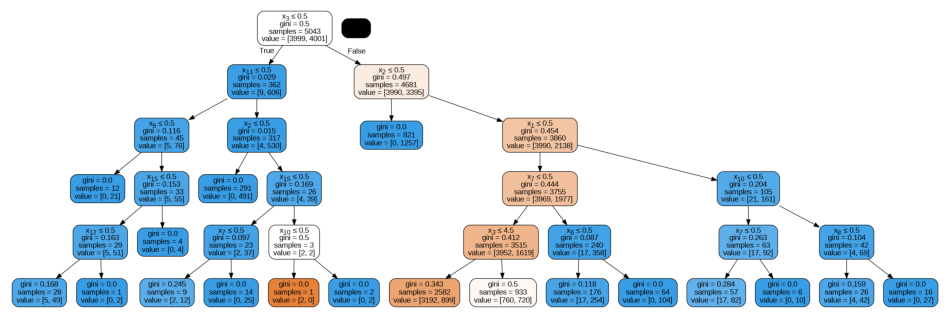

In [12]:
# Display the tree image
plt.figure(figsize=(12, 12))
plt.imshow(image)
plt.axis('off')
plt.show()